In [1]:
import cv2
from PIL import Image               # to load images
from IPython.display import display # to display images
import keras
from keras import layers
import numpy as np

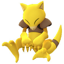

In [2]:

abra = Image.open('dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg')
abra = abra.resize((64,64))
display(abra)

In [3]:
latent_dim=64
height=64
width=64
channels=3

In [4]:
generator_input=keras.Input(shape=(latent_dim,))
x = layers.Dense(128*32*32)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((32,32,128))(x)

x = layers.Conv2D(256, 5, padding = 'same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides = 2, padding = 'same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding = 'same')(x)
x = layers.LeakyReLU()(x)
# x = layers.Conv2D(256, 5, padding = 'same')(x)
# x = layers.LeakyReLU()(x)
# x = layers.Dropout(0.4)(x)
x = layers.Conv2D(channels, 7, activation = 'tanh', padding= 'same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 131072)            8519680   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 131072)            0         
_________________________________________________________________
reshape (Reshape)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 64, 64, 256)       104883

In [6]:
discriminator_input = keras.Input(shape=(height,width,channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides = 2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides = 2)(x)
# x = layers.LeakyReLU()(x)
# x = layers.Conv2D(128, 4, strides = 2)(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

discrimnator = keras.models.Model(discriminator_input, x)
discrimnator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       262272    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 128)       0   

In [7]:
discriminator_optimizer = keras.optimizers.RMSprop(learning_rate= 0.0008, clipvalue= 1, decay = 1e-8)

In [8]:
discrimnator.compile(optimizer= discriminator_optimizer, loss='binary_crossentropy')

In [9]:
discrimnator.trainable = False
gan_input = keras.Input(shape= (latent_dim,))
gan_output = discrimnator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan_optimzer = keras.optimizers.RMSprop(learning_rate= 0.0004, clipvalue= 1, decay= 1e-8)
gan.compile(optimizer= gan_optimzer, loss = 'binary_crossentropy')

In [10]:
import os

In [52]:
x = []
for f in os.listdir('dataset'):
    for p in os.listdir('dataset/' + f):
        if not p.endswith('svg'):
            # a = Image.open('dataset/' + f + '/' + p)
            a = cgitv2.imread('dataset/' + f + '/' + p)
            try:
                a = cv2.resize(a,(64,64))
                x.append(a)
            except Exception as e:
                print(str(f + "  ==" + p))

OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [53]:
  len(x)

10665

'<bound method Image.tobytes of <PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCB13DA460>>'